In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [5]:
d_PTVs = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
))

# d_coding = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

# d_all = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))


2018-10-04 13:56:38,989 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz


In [6]:
labels_dict = {
    'Body mass index (BMI)': 'BMI',
    'heart attack/myocardial infarction': 'MI', 
    'cholelithiasis/gall stones': 'Gallstones',     
}


2018-05-14 11:08:03,475 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS10_PTVsGene/figS10.pdf
2018-05-14 11:08:05,645 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS10_PTVsGene/figS10.png


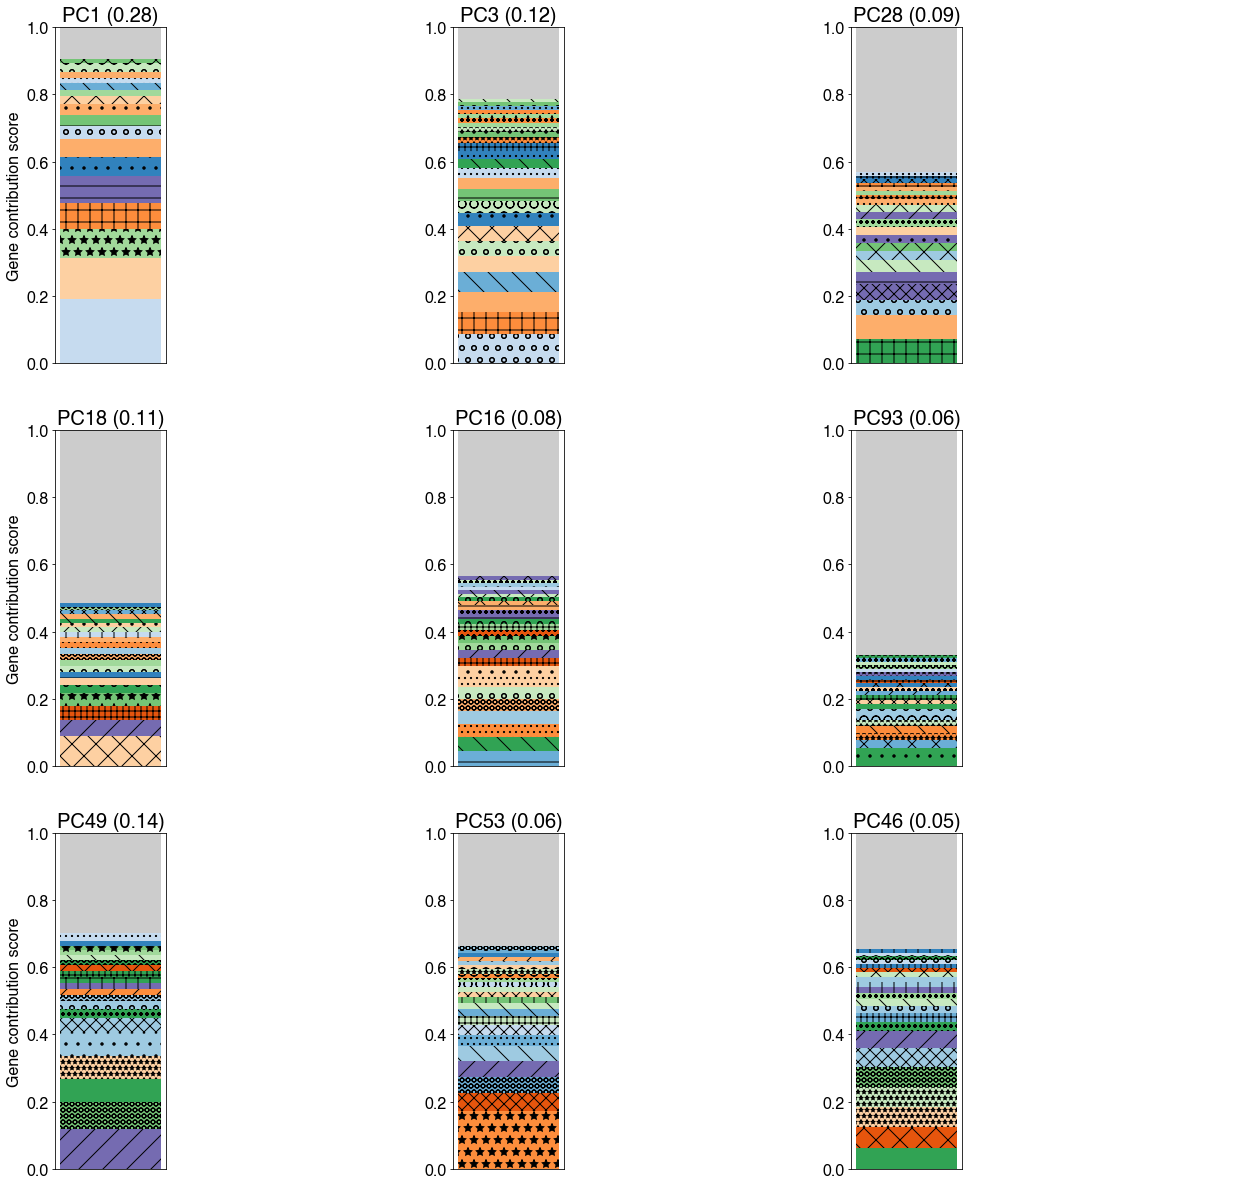

In [7]:
decomposition.plot_contribution_and_save(
    d = d_PTVs, 
    phe_or_gene = 'gene', 
    labels = labels_dict.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'figS10', 
    fig_spacing = 3, 
    contribution_thr=0.01,
    pc_y_max = 1, 
    figsize=(21,21)
)

In [7]:
var_gene_labels_df = pd.read_table(
    os.path.join(repo_dir, 'private_data', 'variant_and_gene_labels.tsv.gz'),
    compression='gzip'
)

gene_dict = dict(zip(
    var_gene_labels_df['Gene'], 
    var_gene_labels_df['label_gene']
))

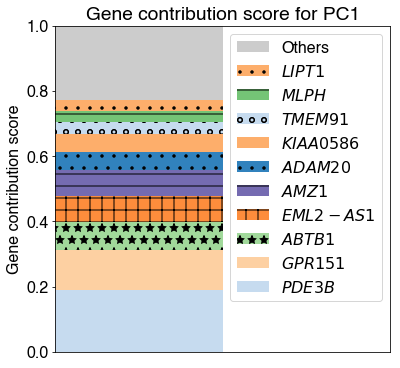

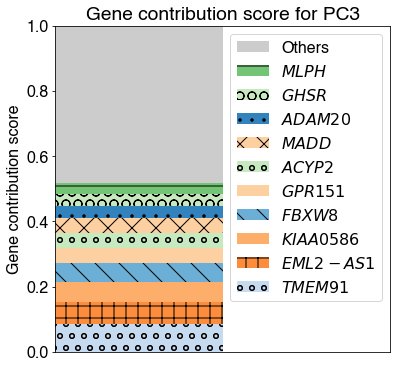

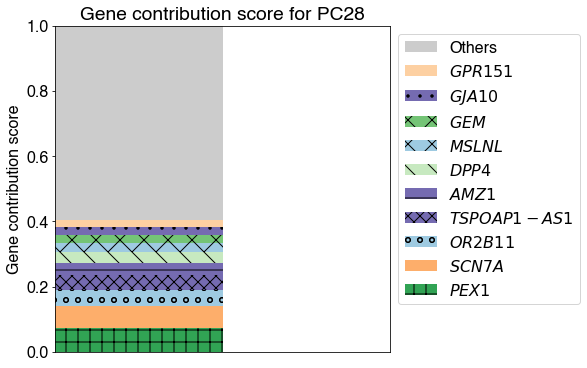

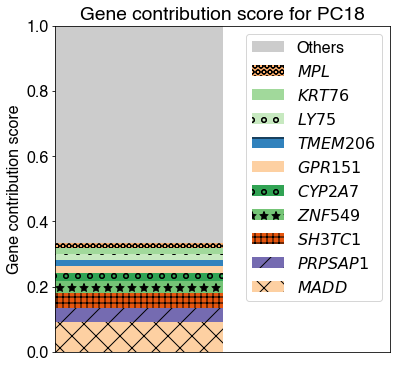

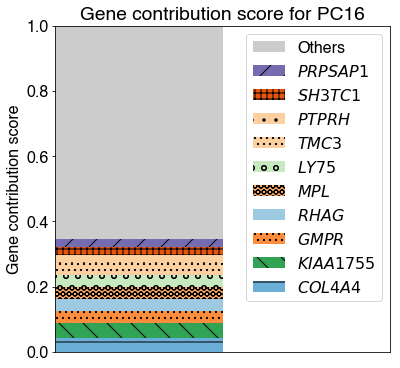

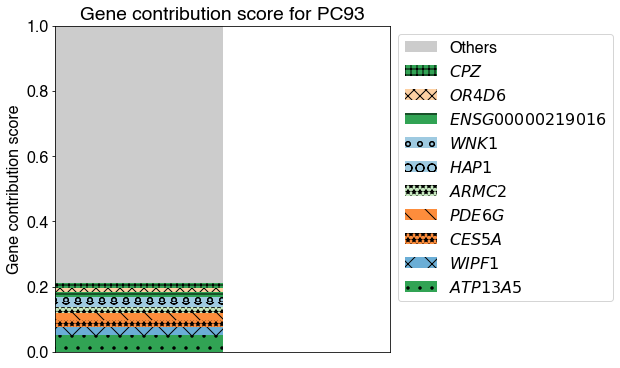

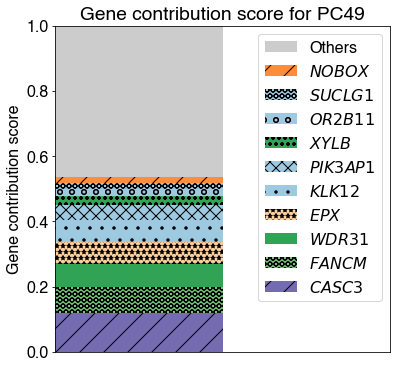

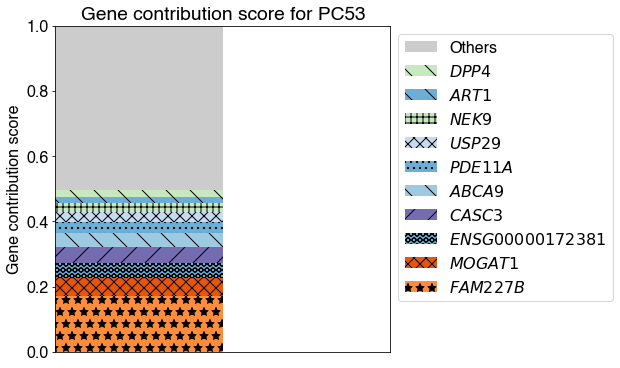

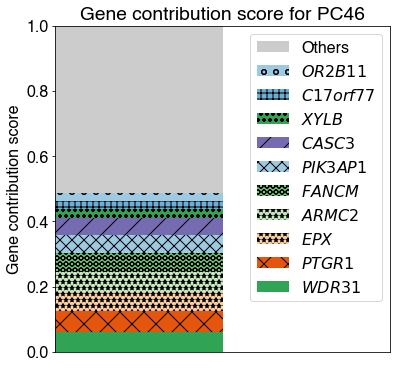

In [8]:
decomposition.plot_contribution_legend_gene_batch_fig(
    labels_dict, 
    gene_dict,
    out_dir, 
    fig_title = 'figS10', 
    d = d_PTVs, 
    topk = 3, 
)